In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# One Hot Representation

In [51]:
corpus = [
    'Time flies like an arrow',
    'Fruit flies like a banana'
]
corpus

['Time flies like an arrow', 'Fruit flies like a banana']

In [72]:
def get_vocab(corpus):
    vocab = []
    for sentence in corpus:
        for word in sentence.split():
            if word not in vocab:
                vocab.append(word.lower())
    return vocab
                
vocab = get_vocab(corpus)
vocab

['time', 'flies', 'like', 'an', 'arrow', 'fruit', 'a', 'banana']

In [88]:
onehot_vectorizer = CountVectorizer(lowercase=True, binary=True)
onehot = onehot_vectorizer.fit_transform(corpus).toarray()

onehot

array([[1, 1, 0, 1, 0, 1, 1],
       [0, 0, 1, 1, 1, 1, 0]])

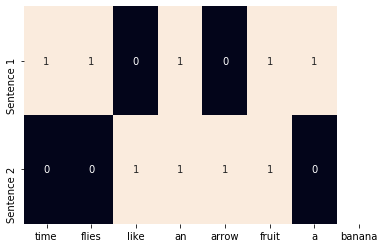

In [89]:
#plt.figure(figsize=(15,5))
sns.heatmap(onehot, annot=True, cbar=False, xticklabels=vocab, yticklabels=['Sentence 1','Sentence 2'])
plt.show()

# TF-IDF

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvectorizer = TfidfVectorizer()
tfidfvector = tfidfvectorizer.fit_transform(corpus).toarray()

tfidfvector

array([[0.49922133, 0.49922133, 0.        , 0.35520009, 0.        ,
        0.35520009, 0.49922133],
       [0.        , 0.        , 0.57615236, 0.40993715, 0.57615236,
        0.40993715, 0.        ]])

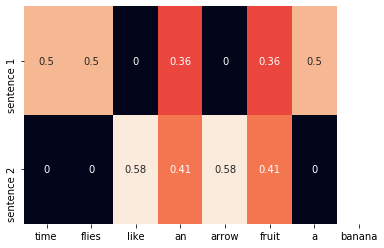

In [91]:
sns.heatmap(tfidfvector, annot=True, cbar=False, xticklabels=vocab, yticklabels=['sentence 1','sentence 2'] )
plt.show()

# Tokenization

In [92]:
import spacy
nlp = spacy.load('en')

In [93]:
text = "Mary, don't slap the green witch."

In [94]:
for tokens in nlp(text.lower()):
    print(tokens)

mary
,
do
n't
slap
the
green
witch
.


In [95]:
from nltk.tokenize import TweetTokenizer

In [96]:
tweet = u"Snow White and the Seven Degrees #MakeAMovieCold @midnight:)"
tokenizer = TweetTokenizer()

In [99]:
tweet_tokens = tokenizer.tokenize(tweet)
tweet_tokens

['Snow',
 'White',
 'and',
 'the',
 'Seven',
 'Degrees',
 '#MakeAMovieCold',
 '@midnight',
 ':)']

# Unigram, Bigram, Trigram, ... (N-Gram)

In [103]:
def n_gram(text, n):
    return [ text[i:i+n] for i in range(len(text)-n+1) ]

In [105]:
n_gram(tweet_tokens,3)

[['Snow', 'White', 'and'],
 ['White', 'and', 'the'],
 ['and', 'the', 'Seven'],
 ['the', 'Seven', 'Degrees'],
 ['Seven', 'Degrees', '#MakeAMovieCold'],
 ['Degrees', '#MakeAMovieCold', '@midnight'],
 ['#MakeAMovieCold', '@midnight', ':)']]

# Lemmas, Stems

In [106]:
doc = nlp(u"he was running late")

In [110]:
for token in doc:
    print(f'{token} \t --> {token.lemma_}')

he 	 --> -PRON-
was 	 --> be
running 	 --> run
late 	 --> late
